<h5 style="color:#FFFFA5"> 1. 선형회귀 </h5>

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
df = pd.read_csv('./data/LinearRegressionData.csv')
df.head(3)

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14


<p style="font-size:20px"> 데이터세트에서 독립변수와 종속변수의 값을 저장한다.  </p>
<p style="font-size:14px"> 1) 독립변수(원인)에 모든 행의 처음부터 마지막 칼럼 직전까지의 데이터 값을 X에 저장한다.  </p>
<p style="font-size:14px"> 2) 종속변수(결과)에 모든 행의 마지막 칼럼 데이터 값을 y에 저장한다.  </p>

In [42]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [18]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

In [45]:
y

array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
        68,  72,  58,  76,  86,  90, 100], dtype=int64)

In [46]:
X

array([[ 0.5],
       [ 1.2],
       [ 1.8],
       [ 2.4],
       [ 2.6],
       [ 3.2],
       [ 3.9],
       [ 4.4],
       [ 4.5],
       [ 5. ],
       [ 5.3],
       [ 5.8],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.9],
       [ 7.2],
       [ 8.4],
       [ 8.6],
       [10. ]])

<h5 style="color:#FFFFA5"> 2. 선형회귀 시각화 </h5>

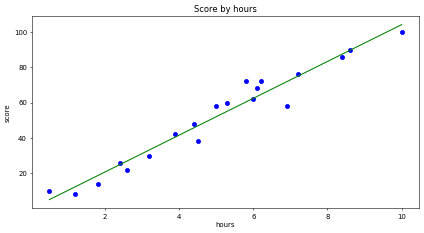

In [19]:
# 실제 값들은 scatter() 함수를 이용해 산점도 그래프로 예측 값들은 plot() 함수를 이용하여 선 그래프로 출력해 본다.
plt.figure(figsize=(10,5), dpi=50)
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='green') #직선
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [48]:
reg.predict([[9], [8], [5]])

array([93.77478776, 83.33109082, 52.        ])

In [49]:
# 기울기(coefficient)값 m을 출력
m = reg.coef_
m

array([10.44369694])

In [50]:
# 절편(intercepter)값 출력
b = reg.intercept_
b

-0.21848470286721522

In [51]:
y = m * 9 + b
y

array([93.77478776])

<h5 style="color:#FFFFA5"> 3. 데이터 세트 분리 </h5>

In [56]:
df =  pd.read_csv('./data/LinearRegressionData.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [57]:
# train_test_split(80:20) 함수를 이용해 훈련 세트와 테스트 세트를 분리한다
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
# 전체 데이터 세트 값과 개수 출력
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [62]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [63]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [64]:
y_test, len(y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

In [65]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

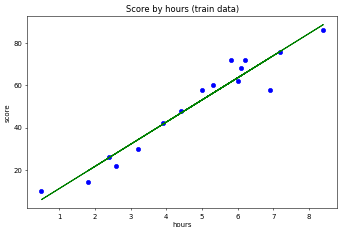

In [68]:
# 훈련 세트의 데이터 시각화

y_pred = reg.predict(X_train)
plt.figure(figsize=(8,5), dpi=50)
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_pred, color='green')
plt.title('Score by hours (train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

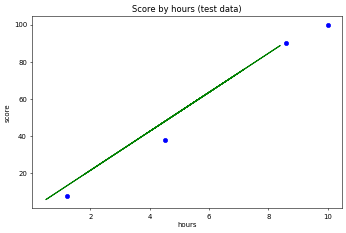

In [71]:
# 테스트 세트의 데이터 시각화

plt.figure(figsize=(8,5), dpi=50)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, y_pred, color='green')
plt.title('Score by hours (test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [72]:
# 기울기
reg.coef_

array([10.49161294])

In [73]:
# y절편
reg.intercept_

0.6115562905169796

In [74]:
# 테스트 세트 평가
reg.score(X_test, y_test)

0.9727616474310156

In [78]:
# 훈련 세트 평가
reg.score(X_train, y_train)

0.9356663661221668

<h5 style="color:#FFFFA5"> 4. 경사하강법 </h5>

In [79]:
X_train, y_train

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64))

In [103]:
# 모델 생성
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=10, eta0=0.001, random_state=0, verbose=1) #max_iter=10 반복 횟수
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 2.40, NNZs: 1, Bias: 0.442470, T: 16, Avg. loss: 1181.034371
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.84, NNZs: 1, Bias: 0.697455, T: 32, Avg. loss: 754.011321
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.89, NNZs: 1, Bias: 0.881472, T: 48, Avg. loss: 520.842928
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.70, NNZs: 1, Bias: 1.023556, T: 64, Avg. loss: 374.527388
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.34, NNZs: 1, Bias: 1.137258, T: 80, Avg. loss: 277.717040
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 6.88, NNZs: 1, Bias: 1.230635, T: 96, Avg. loss: 210.603548
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 7.32, NNZs: 1, Bias: 1.308149, T: 112, Avg. loss: 162.433366
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 7.69, NNZs: 1, Bias: 1.372847, T: 128, Avg. loss: 127.468199
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 8.01, NNZs: 1, Bias: 1.427757, T: 144, Avg. loss: 101.814505
Total training time: 0.

c:\Users\kum95\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.001, max_iter=10, random_state=0, verbose=1)

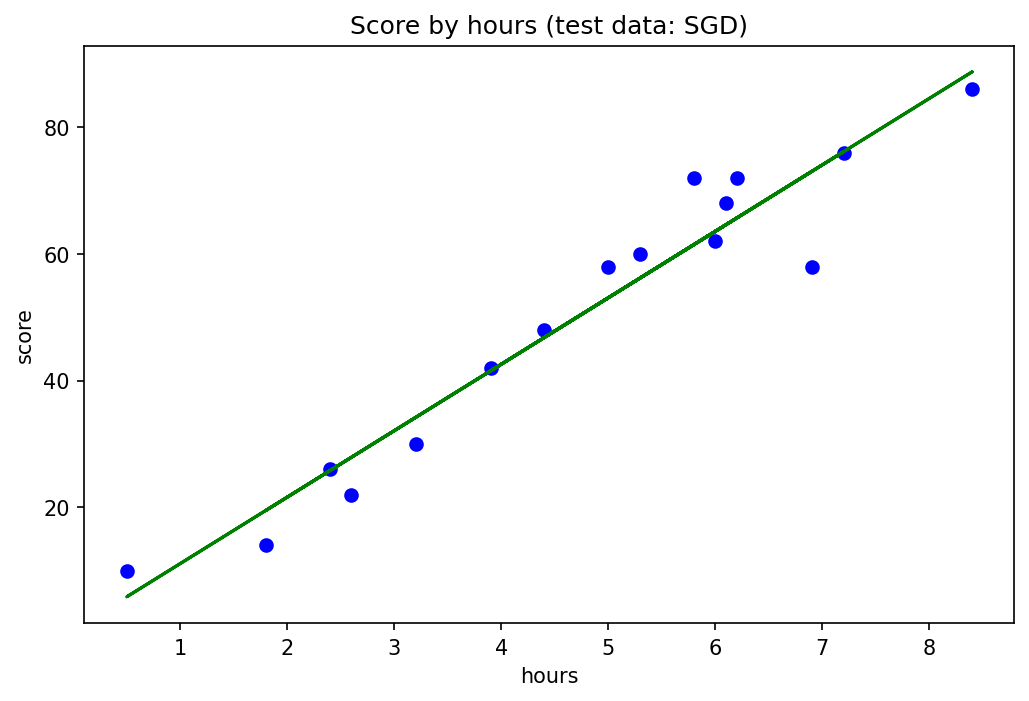

In [104]:
y_pred = reg.predict(X_train)
plt.figure(figsize=(8,5), dpi=150)
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_pred, color='green')
plt.title('Score by hours (test data: SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show() #LinearRegression이용한 직선과 거의 유사하다.

In [82]:
sr.score(X_train, y_train)

0.9351846599813627

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [8]:
df = pd.read_csv(('./data/LinearRegressionData.csv'))
X = df.iloc[: , :-1].values
y = df.iloc[: , -1].values

In [9]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [10]:
reg.predict([[9]])

array([93.77478776])

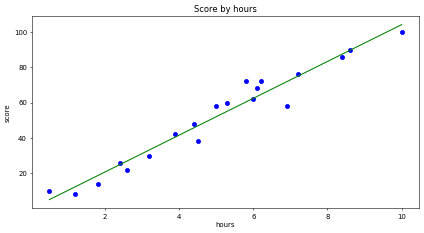

In [20]:
plt.figure(figsize=(10,5), dpi=50)
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='green') #직선
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()